### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'pr-SNL_MSU_DOE_avg_sp-random_va-True_ba-False_lr-0032_we-0141_ba-256_se-True'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
Dataset size: 1434 478 478


### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.0032092770724124367, 'weight_decay': 0.014122328496073377, 'batch_size': 256}


### Training

Epoch: 1/1000, Train loss: 10.9044, Val loss: 4.9241, Min val loss: 4.9241
Epoch: 100/1000, Train loss: 0.3211, Val loss: 0.5001, Min val loss: 0.4878
Epoch: 200/1000, Train loss: 0.2740, Val loss: 0.5331, Min val loss: 0.4811
Epoch: 300/1000, Train loss: 0.2622, Val loss: 0.5311, Min val loss: 0.4811
Epoch: 400/1000, Train loss: 0.2330, Val loss: 0.6095, Min val loss: 0.4811
Epoch: 500/1000, Train loss: 0.2010, Val loss: 0.5529, Min val loss: 0.4811
Epoch: 600/1000, Train loss: 0.1994, Val loss: 0.6011, Min val loss: 0.4811
Early stopping at epoch 605, Checkpoint at epoch 105, Train loss: 0.3321, Val loss: 0.4811
Minimum loss: 0.48112088441848755


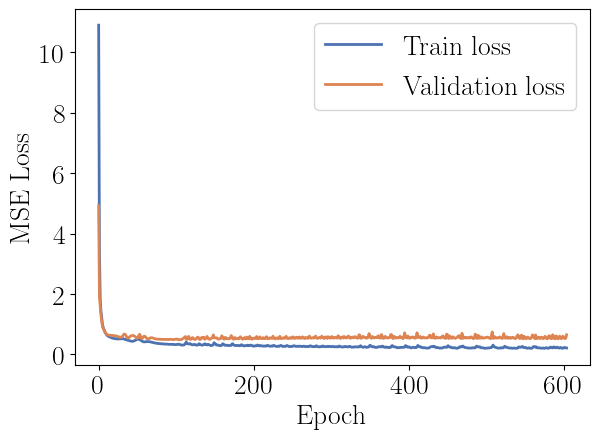

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train MSE Loss: 0.1445, R2: 0.9156
Validation MSE Loss: 0.3683, R2: 0.7756
Test MSE Loss: 0.3774, R2: 0.7284


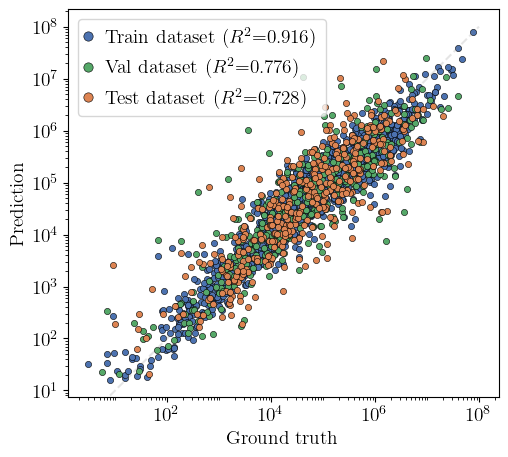

In [4]:
trainer.plot_truth_pred()

Train MSE Loss: 0.3142, R2: 0.8082
Validation MSE Loss: 0.2966, R2: 0.8074
Test MSE Loss: 0.2885, R2: 0.8303


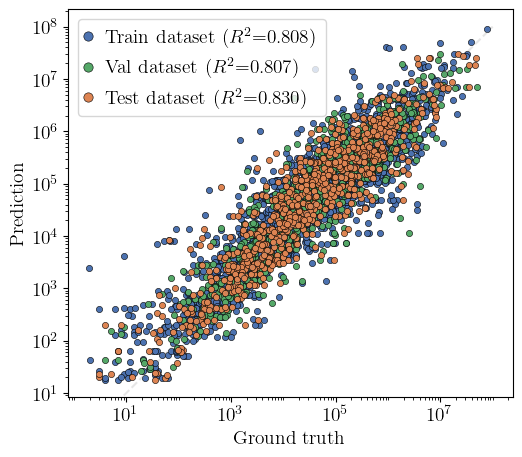

In [6]:
trainer.plot_truth_pred()

Train MSE Loss: 0.0586, R2: 0.9642
Test MSE Loss: 0.2401, R2: 0.8587


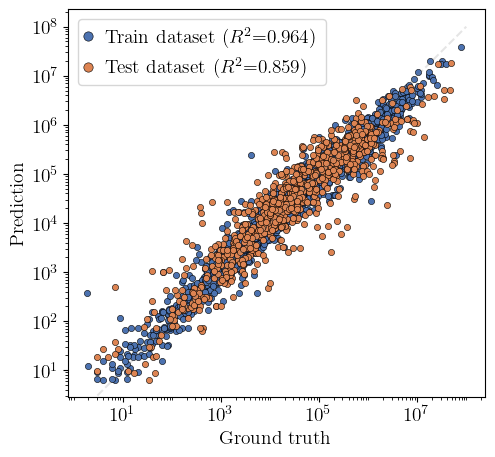

In [7]:
trainer.plot_truth_pred_sklearn(model_name='rf')

NN(
  (net): Sequential(
    (input): Linear(in_features=14, out_features=16, bias=True)
    (ReLU): ReLU()
    (0): Linear(in_features=16, out_features=64, bias=True)
    (ReLU0): ReLU()
    (1): Linear(in_features=64, out_features=128, bias=True)
    (ReLU1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (ReLU2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (ReLU3): ReLU()
    (4): Linear(in_features=64, out_features=16, bias=True)
    (ReLU4): ReLU()
    (output): Linear(in_features=16, out_features=1, bias=True)
  )
)

### Permutation feature importance

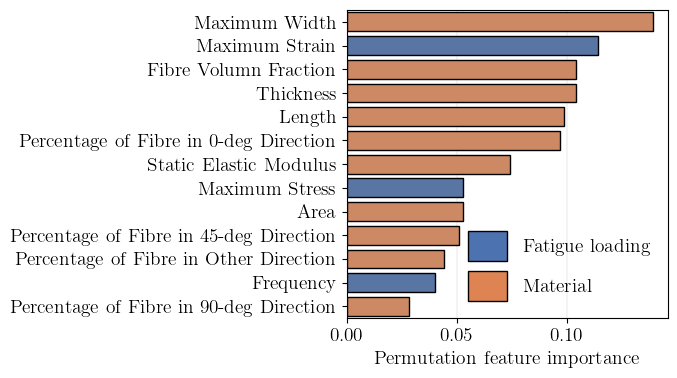

In [6]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Thickness
Calculate PDP:  Maximum Width
Calculate PDP:  Area
Calculate PDP:  Length
Calculate PDP:  Maximum Strain
Calculate PDP:  Maximum Stress
Calculate PDP:  Frequency
Calculate PDP:  Static Elastic Modulus


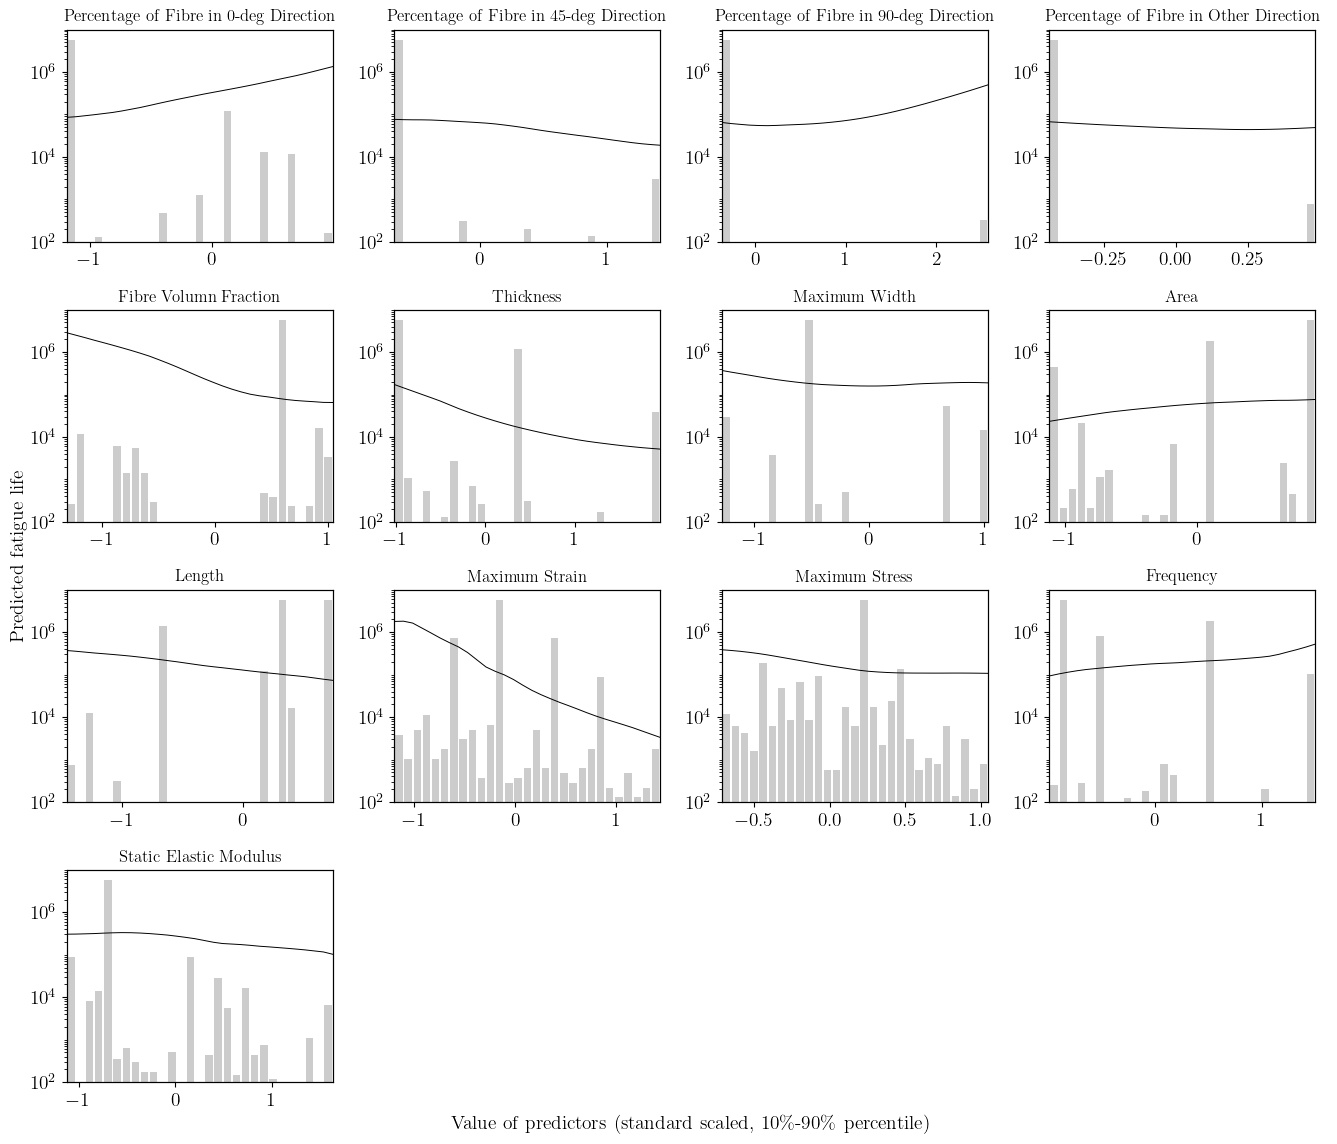

In [7]:
trainer.plot_partial_dependence()

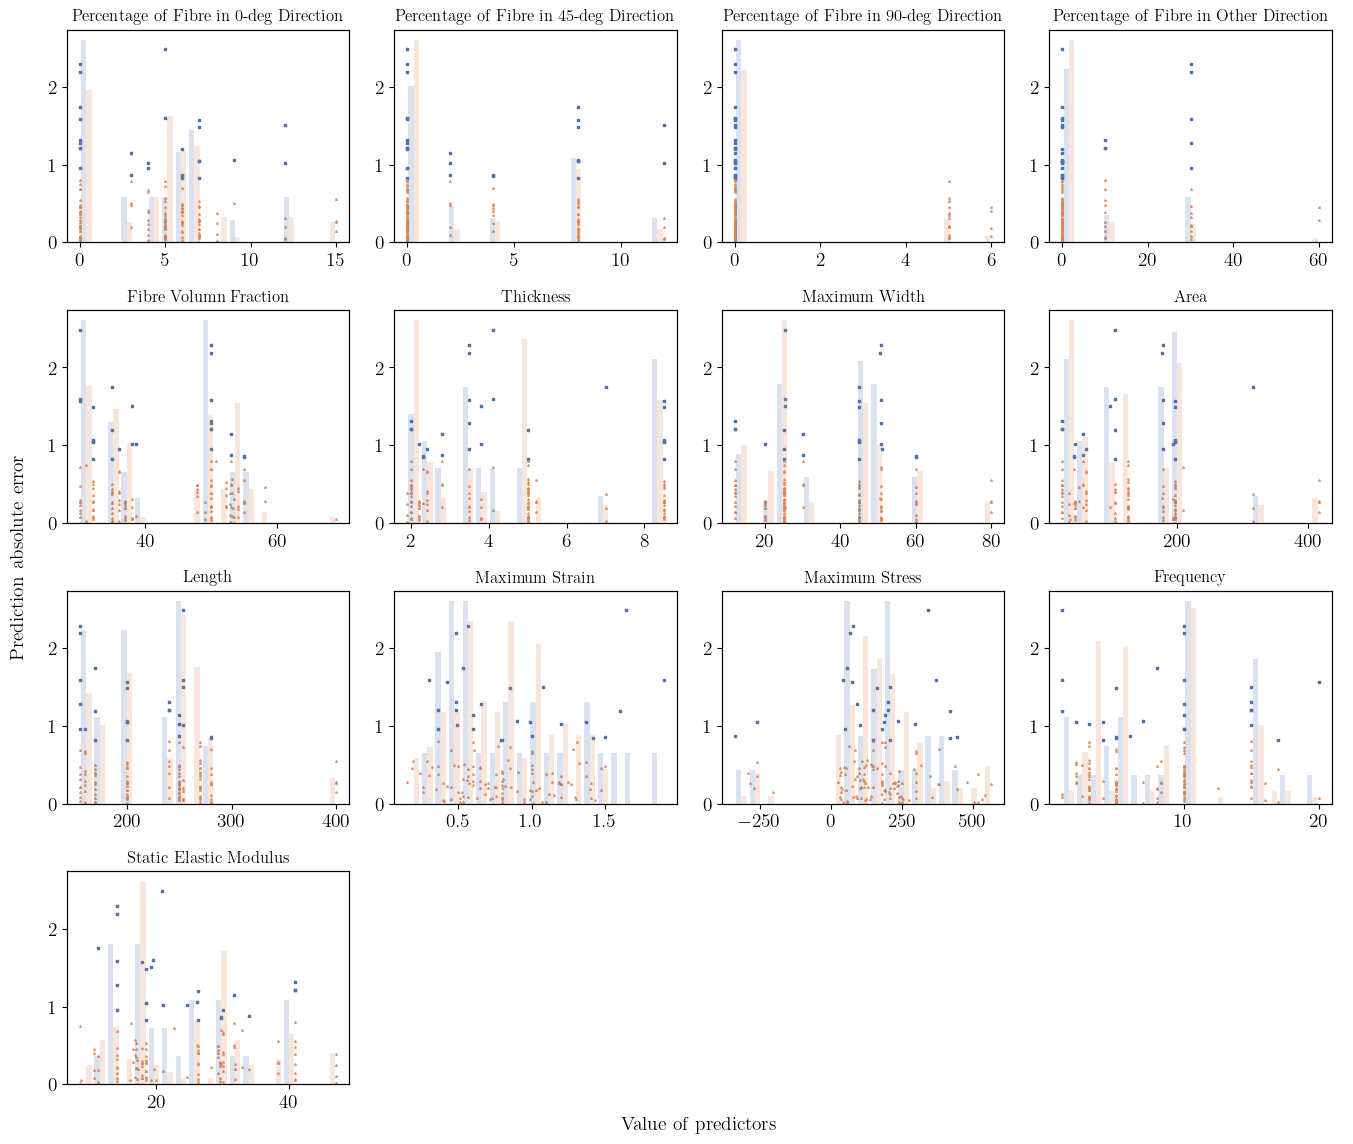

In [8]:
trainer.plot_partial_err()